In [35]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [36]:
#Reading file for Home Audio
home_audio = pd.read_csv('HomeAudio.csv')
home_audio.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [37]:
home_audio = home_audio.drop(['Unnamed: 0'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [38]:
# Drop lag, MA and GMV columns
home_audio = home_audio.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,0.28
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.12
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.03
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.11
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.00


In [39]:
home_audio['GMV_lag_1_per'] = home_audio['GMV_lag_1_per'].fillna(0)

In [40]:
home_audio['GMV_lag_1_per'].isna().sum()

0

In [41]:
home_audio = home_audio.drop(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'week', 'week_y', 'month_date'], 
                            axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,0.28
1,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.12
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.03
3,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.11
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.00


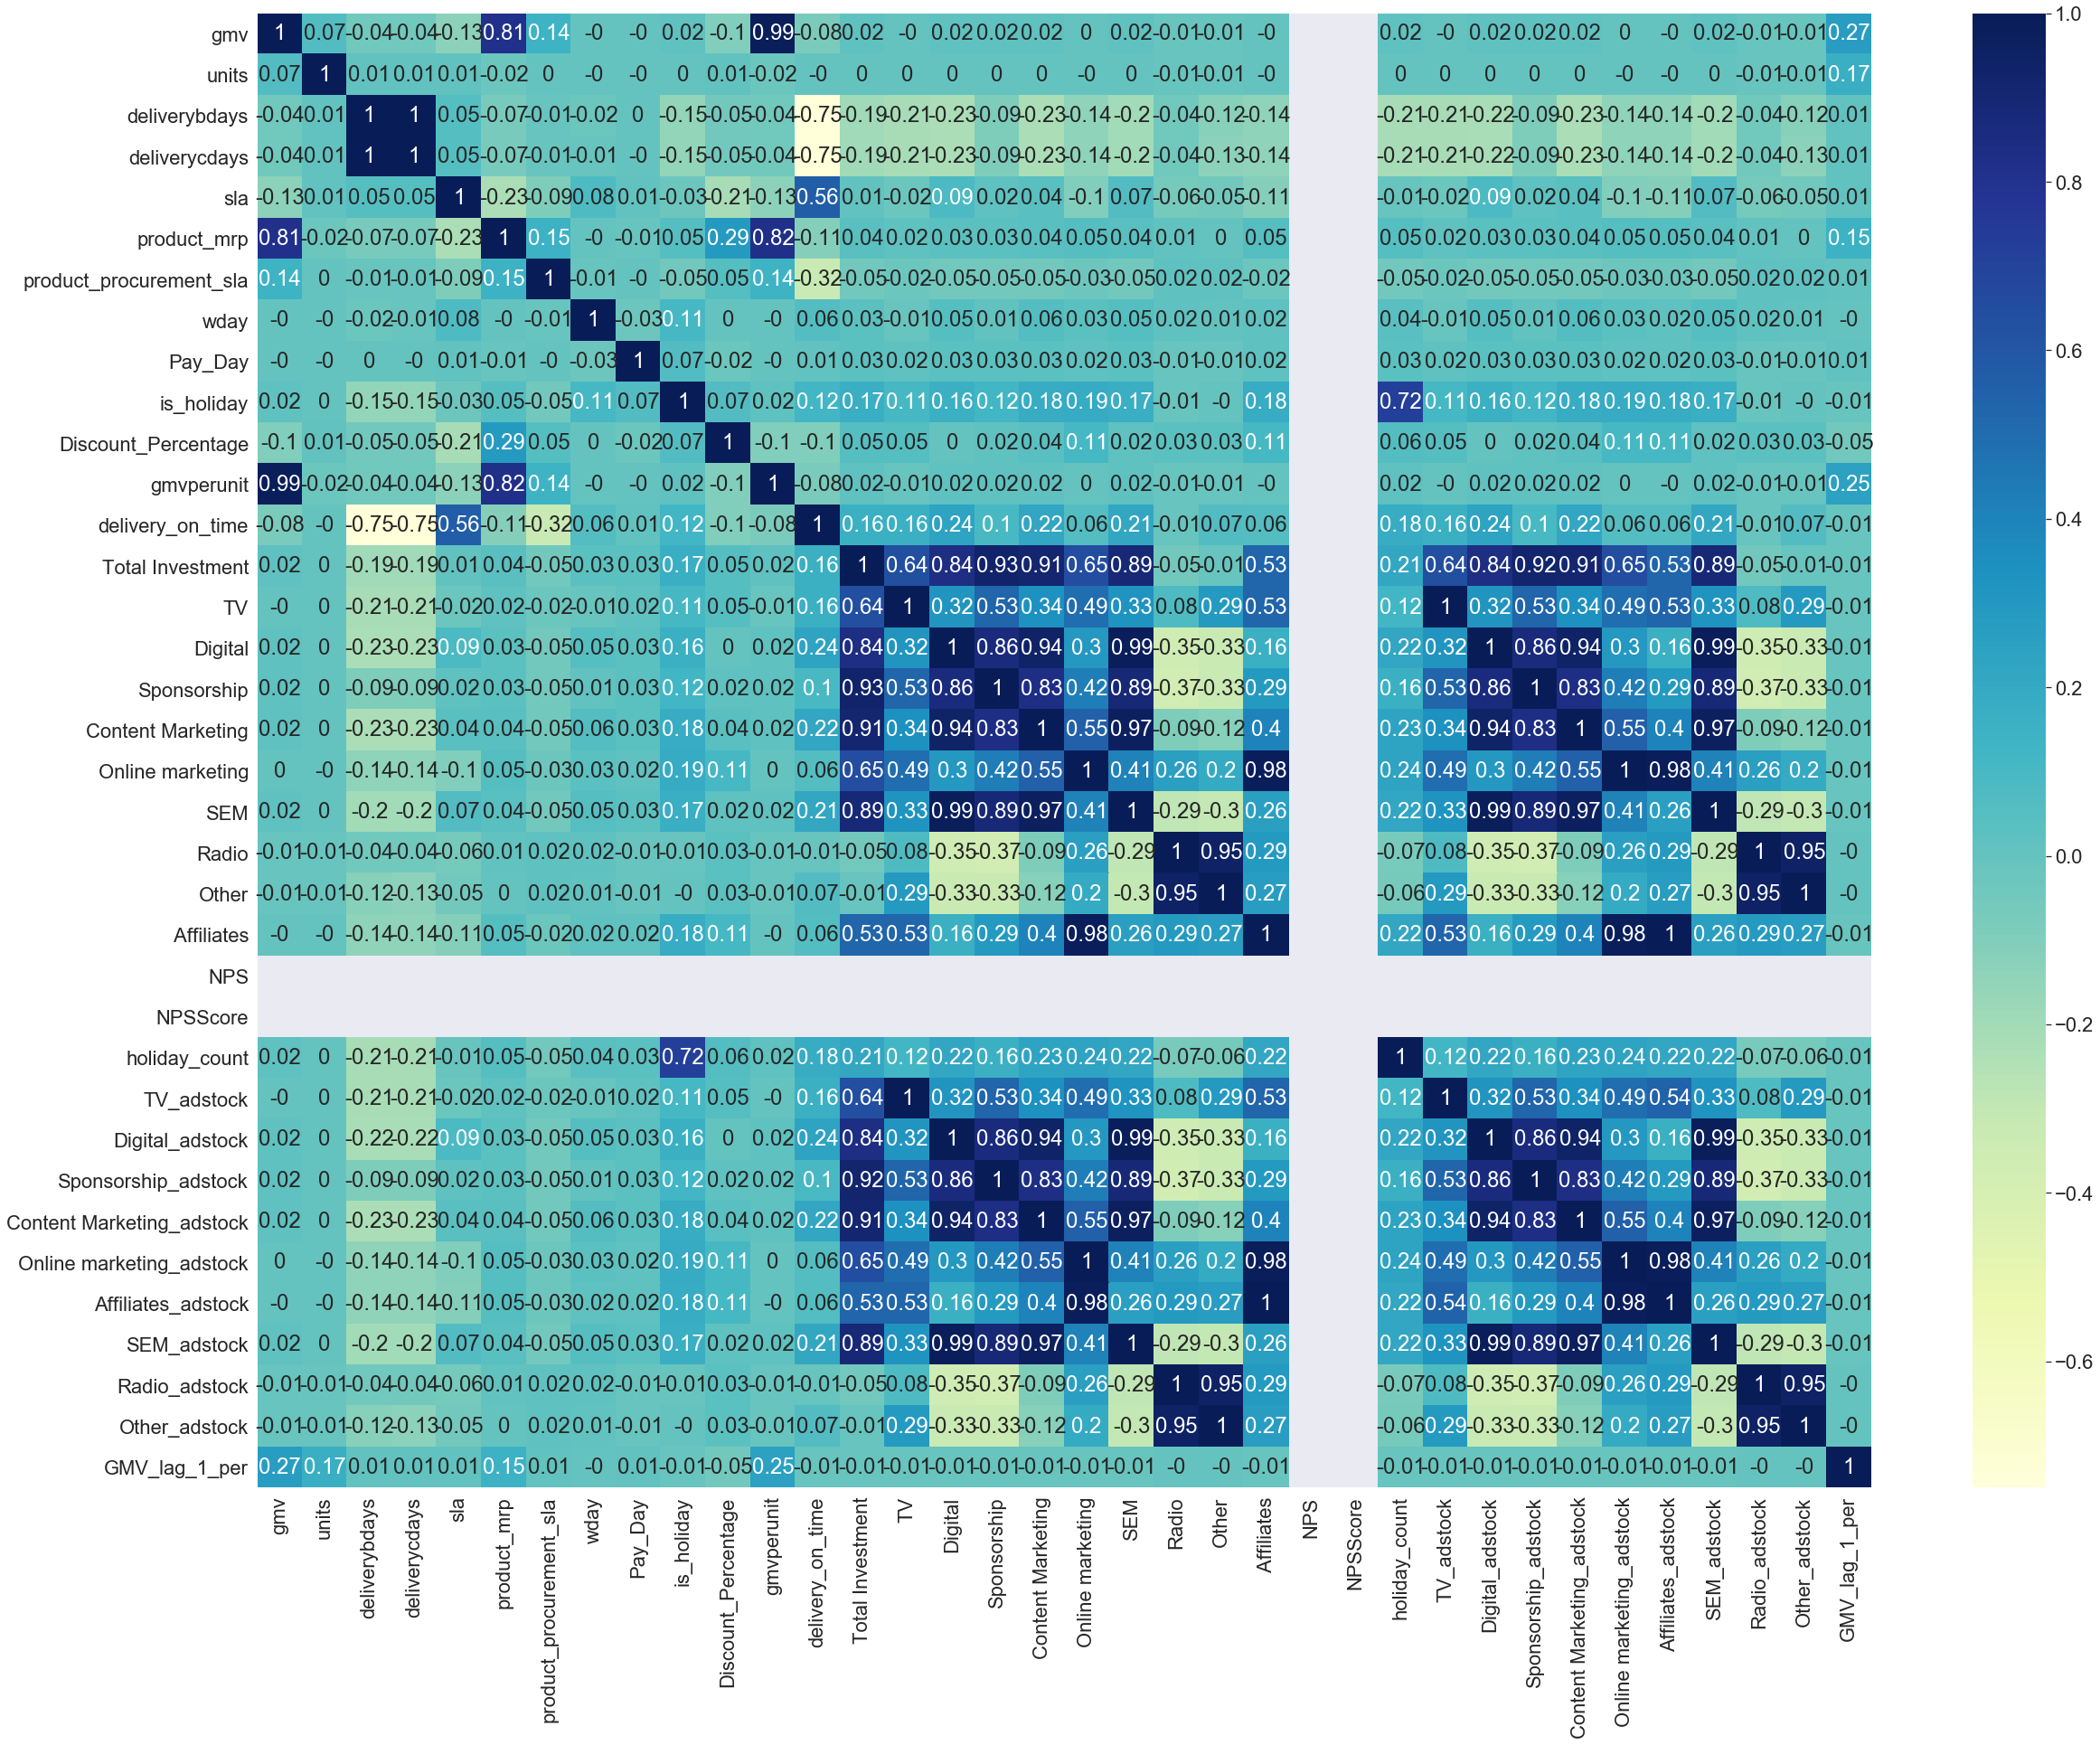

In [42]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(home_audio.corr(), 2), annot=True, cmap="YlGnBu")

In [43]:
home_audio = home_audio.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)

home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,GMV_lag_1_per
0,"7,049.00",1,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,0.00,Luxury,0.28
1,"5,489.00",1,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,Luxury,-0.12
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,Luxury,0.03
3,"6,099.00",1,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,Luxury,-0.11
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,0.00,Luxury,0.00


In [44]:
home_audio.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'Pay_Day', 'is_holiday', 'special_sale', 'Discount_Percentage',
       'delivery_on_time', 'delivery_status', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Radio', 'Other', ' Affiliates', 'NPS', 'NPSScore',
       'holiday_count', 'ItemType', 'GMV_lag_1_per'],
      dtype='object')

In [45]:
home_audio.isnull().sum()

gmv                                  0
units                                0
deliverycdays                        0
s1_fact_order_payment_type           0
sla                                  0
product_analytic_category            0
product_analytic_sub_category        0
product_analytic_vertical            0
product_mrp                          0
product_procurement_sla              0
wday                                 0
Pay_Day                              0
is_holiday                           0
special_sale                         0
Discount_Percentage                  0
delivery_on_time                     0
delivery_status                      0
Total Investment                     0
TV                                   0
Digital                              0
Sponsorship                          0
Content Marketing                    0
Online marketing                     0
SEM                                  0
Radio                                0
Other                    

In [46]:
home_audio['NPS'] = home_audio['NPS'].fillna(0)
home_audio['NPSScore'] = home_audio['NPSScore'].fillna(0)

In [47]:
home_audio.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
NPS                              0
NPSScore            

In [48]:
home_audio.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [49]:
home_audio.shape

(97387, 32)

In [50]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
home_audio.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,GMV_lag_1_per
count,"97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00",...,"97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00","97,387.00"
mean,"2,193.18",1.01,0.84,5.66,"3,934.31",2.65,3.00,0.06,0.21,39.15,...,"2,200,441.85","43,139,493.17","22,741,042.80","1,089,306.58","11,597,821.02","13,594,024.21",0.00,0.00,1.20,0.05
std,"2,031.54",0.17,2.16,2.92,"3,630.33",1.41,1.94,0.24,0.41,20.66,...,"2,574,145.94","14,926,030.19","22,149,336.92","1,991,353.71","20,998,477.06","4,377,084.46",0.00,0.00,1.67,0.87
min,129.00,1.00,0.00,0.00,189.00,0.00,0.00,0.00,0.00,0.00,...,14.28,"291,841.89","5,675,708.40",0.00,0.00,"166,383.18",0.00,0.00,0.00,-0.99
25%,"1,070.00",1.00,0.00,4.00,"1,735.00",1.00,1.00,0.00,0.00,20.59,...,"393,477.44","41,633,783.21","11,343,832.94",0.00,0.00,"14,039,892.47",0.00,0.00,0.00,0.00
50%,"1,999.00",1.00,0.00,5.00,"3,499.00",2.00,3.00,0.00,0.00,43.31,...,"1,440,481.70","48,016,056.55","11,763,933.86",0.00,0.00,"15,415,666.31",0.00,0.00,0.00,0.00
75%,"2,690.00",1.00,0.00,7.00,"5,399.00",4.00,5.00,0.00,0.00,57.18,...,"2,410,047.76","51,709,677.42","25,247,488.07","1,964,516.13","11,260,967.74","15,747,089.60",0.00,0.00,3.00,0.00
max,"75,000.00",19.00,28.00,41.00,"98,000.00",14.00,6.00,1.00,1.00,95.50,...,"7,776,943.00","55,033,046.50","72,093,251.50","6,096,774.19","61,170,967.74","16,641,935.48",0.00,0.00,6.00,114.41


In [51]:
home_audio['delivery_on_time'].unique()

array([  0.,  -3.,   4.,  -2.,  -1.,   1.,   5.,   2.,   3.,   6.,   9.,
        11.,  10.,   8.,   7.,  13.,  -4.,  12., -11.,  15.,  14.,  -5.,
       -13.,  40., -31.,  17.,  18.,  16.,  -8.,  22.,  -9.,  21.,  23.,
        -7., -21.,  -6., -12., -10., -20., -15., -19.,  20., -18., -29.,
       -14., -17., -16., -23.,  24., -22., -38., -28., -37., -45., -30.,
       -32., -26., -24., -34.,  19., -27., -41., -46., -25.])

In [52]:
home_audio=home_audio.loc[(home_audio['delivery_on_time']>0)]
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,GMV_lag_1_per
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury,0.03
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,0.00
8,"6,850.00",1,0,Prepaid,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,-0.00
11,"6,700.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury,-0.03
12,"6,900.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,0.07


In [53]:
home_audio.shape

(62116, 32)

In [54]:
# Subset all categorical variables
home_audio_categorical = home_audio.select_dtypes(include=['object'])
home_audio_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
2,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
4,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
8,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
11,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
12,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury


In [55]:
# Subset all numerical variables
home_audio_numerical = home_audio.select_dtypes(include=['int64','float64'])
home_audio_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,GMV_lag_1_per
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,0.03
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.00
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,-0.00
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,-0.03
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.07


In [56]:
# Convert into dummies
dummies = pd.get_dummies(home_audio_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
# Drop categorical variable columns
home_audio = home_audio.drop(list(home_audio_categorical.columns), axis=1)

In [58]:
# Concatenate dummy variables with X
ha = pd.concat([home_audio, dummies], axis=1)
ha.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0,0,0,0,0,0,1,0,0,0


In [59]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 47 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gmv                                         62116 non-null  float64
 1   units                                       62116 non-null  int64  
 2   deliverycdays                               62116 non-null  int64  
 3   sla                                         62116 non-null  int64  
 4   product_mrp                                 62116 non-null  float64
 5   product_procurement_sla                     62116 non-null  int64  
 6   wday                                        62116 non-null  int64  
 7   Pay_Day                                     62116 non-null  int64  
 8   is_holiday                                  62116 non-null  int64  
 9   Discount_Percentage                         62116 non-null  float64
 10  delivery_o

In [60]:
# missing information
ha.isnull().any()

gmv                                           False
units                                         False
deliverycdays                                 False
sla                                           False
product_mrp                                   False
product_procurement_sla                       False
wday                                          False
Pay_Day                                       False
is_holiday                                    False
Discount_Percentage                           False
delivery_on_time                              False
Total Investment                              False
TV                                            False
Digital                                       False
Sponsorship                                   False
Content Marketing                             False
Online marketing                              False
SEM                                           False
Radio                                         False
Other       

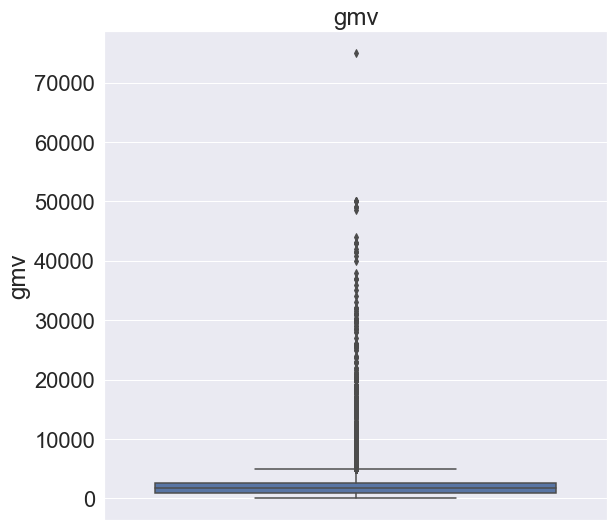

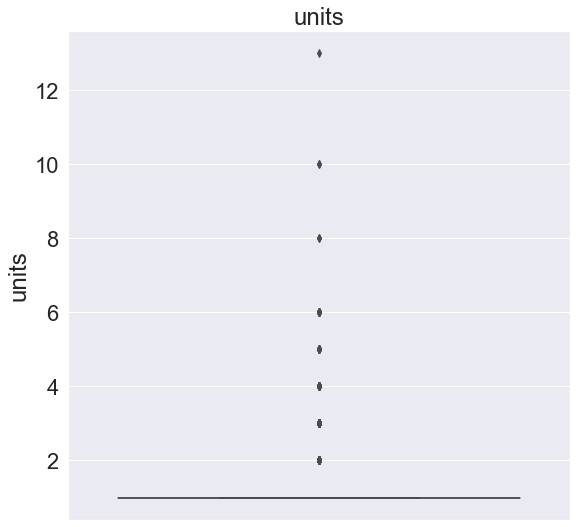

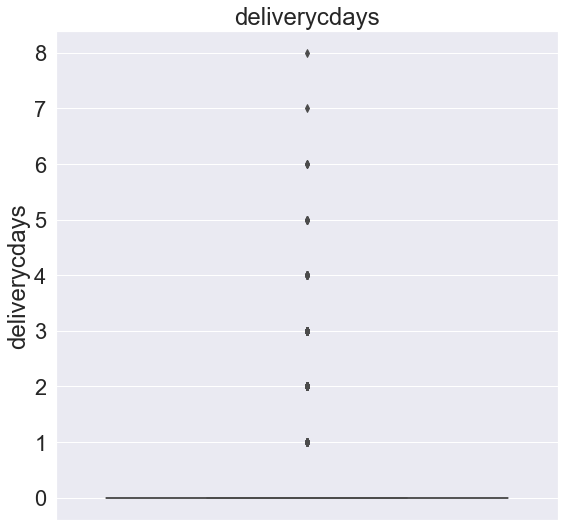

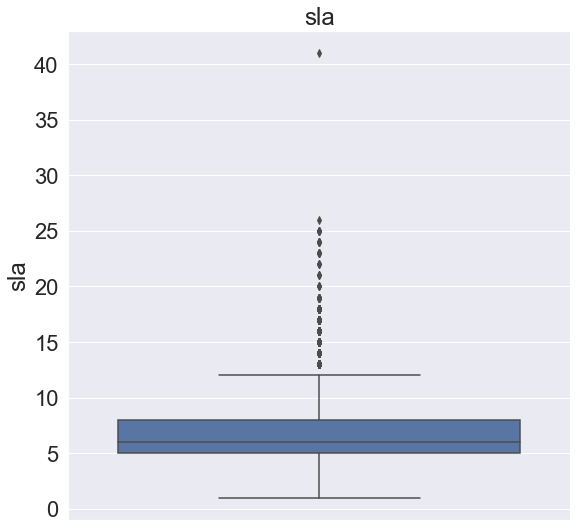

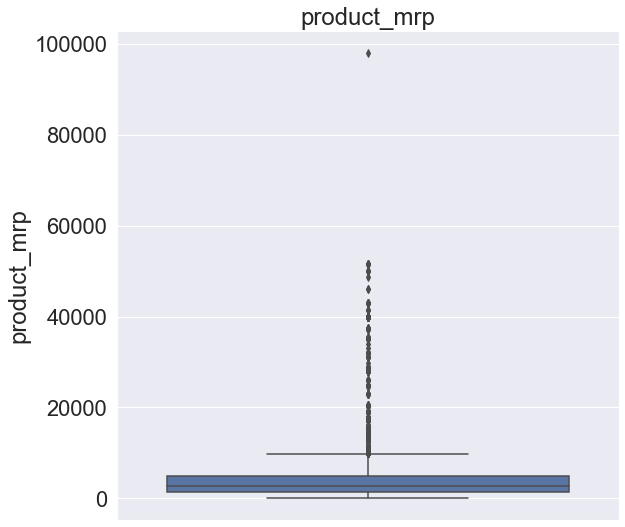

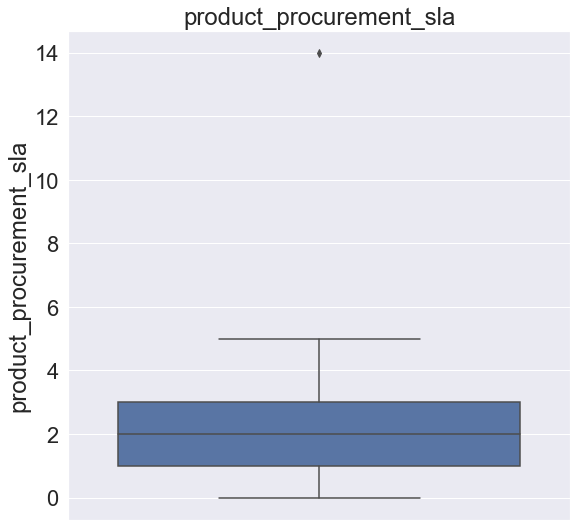

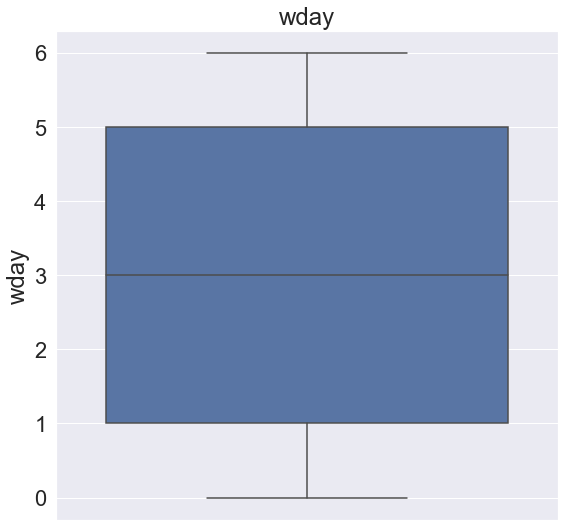

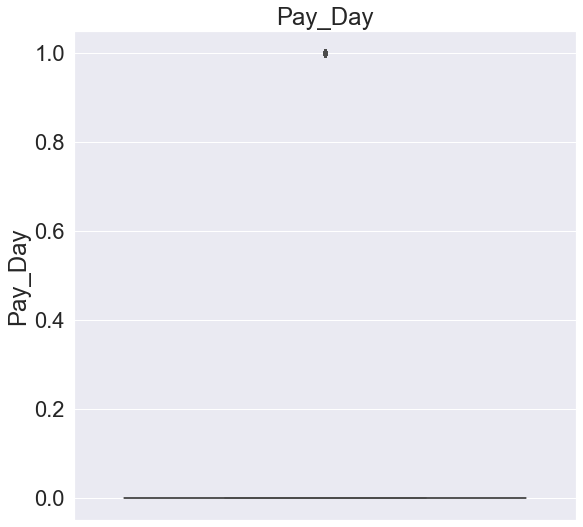

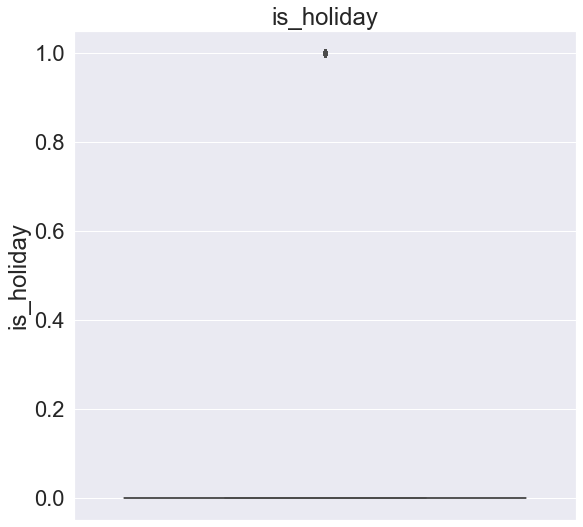

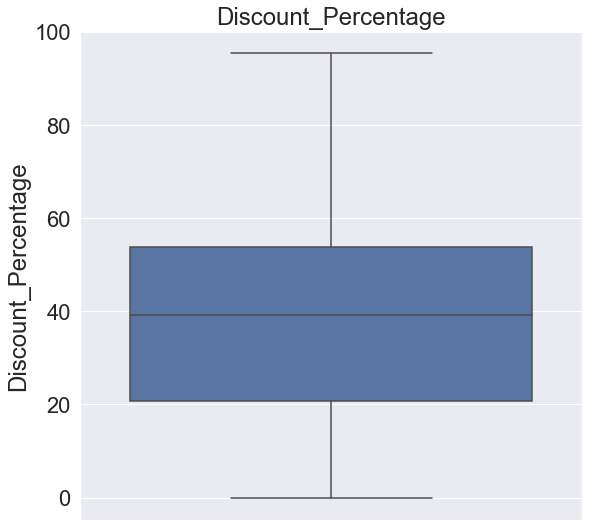

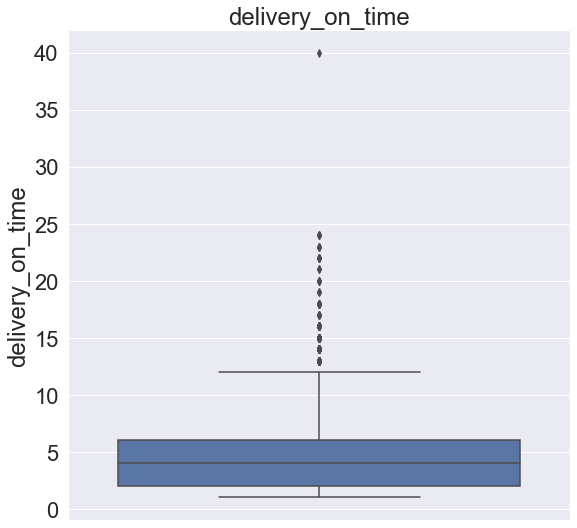

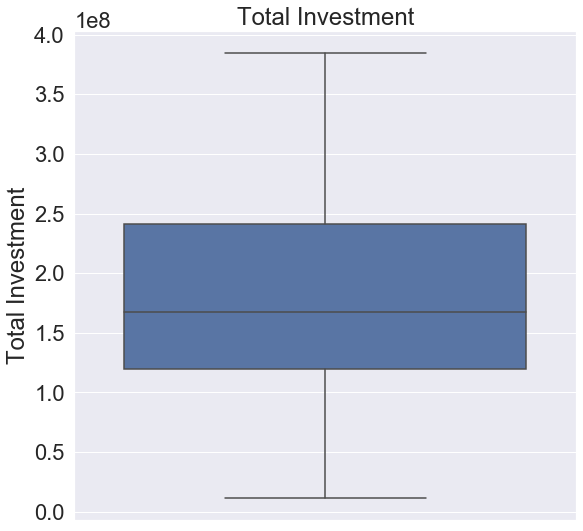

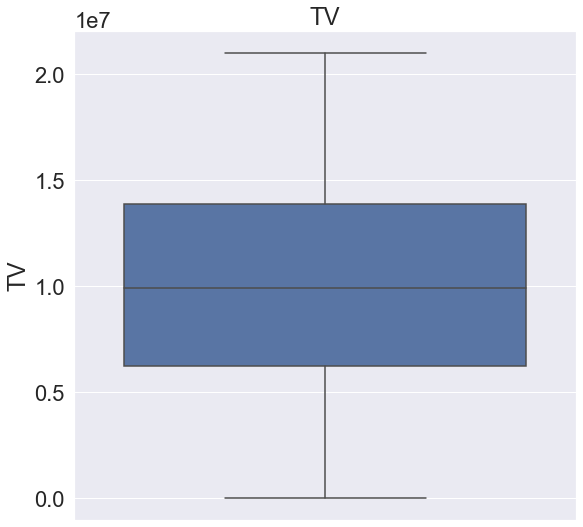

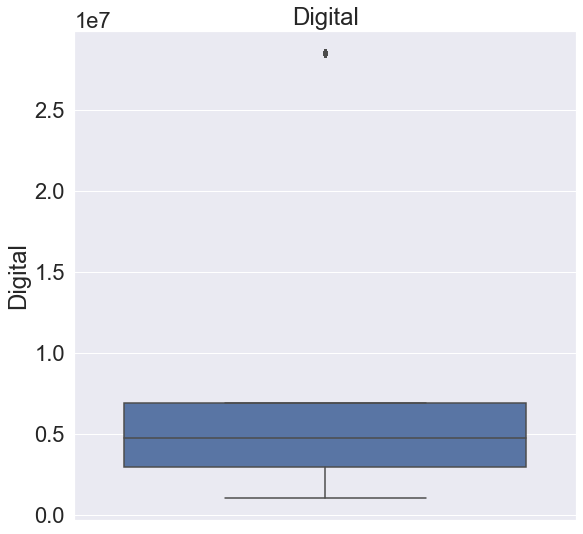

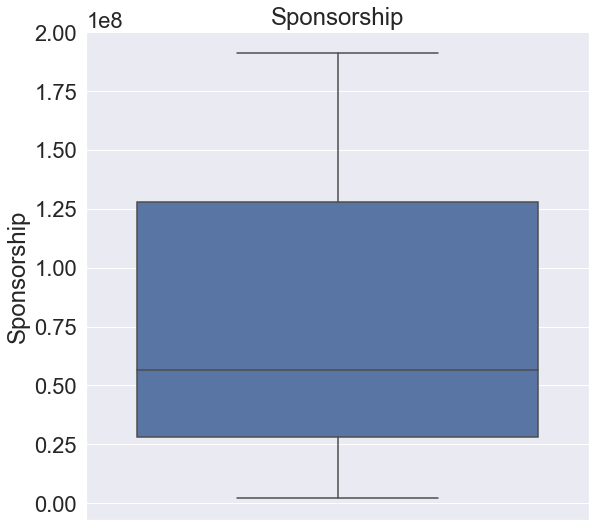

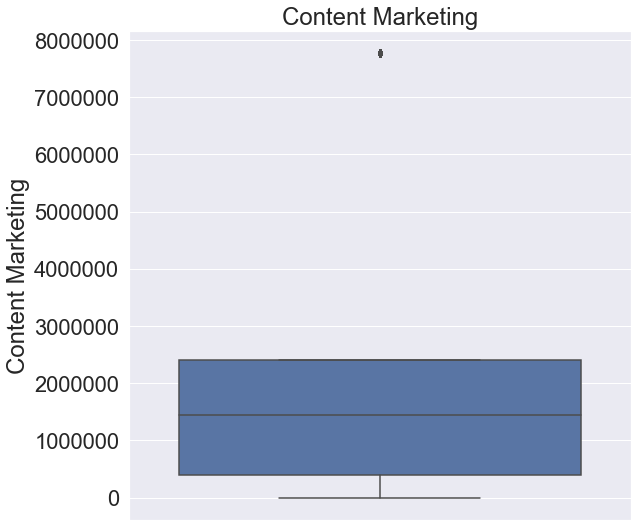

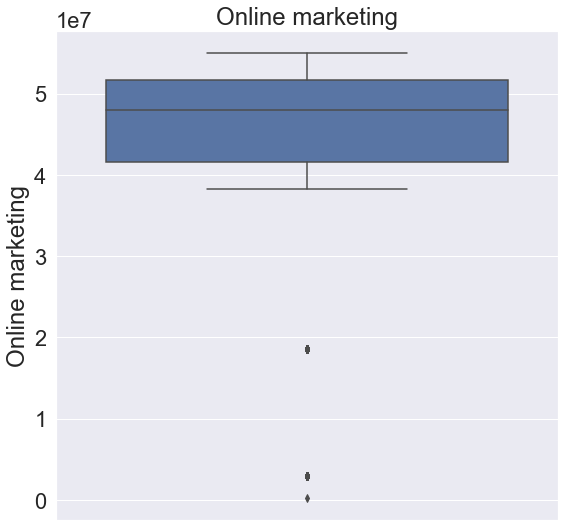

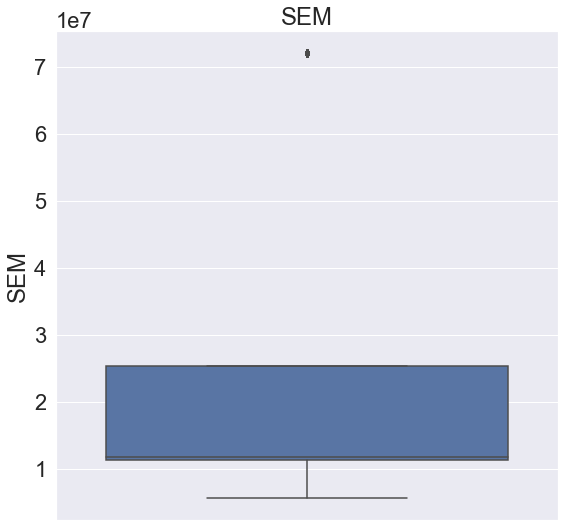

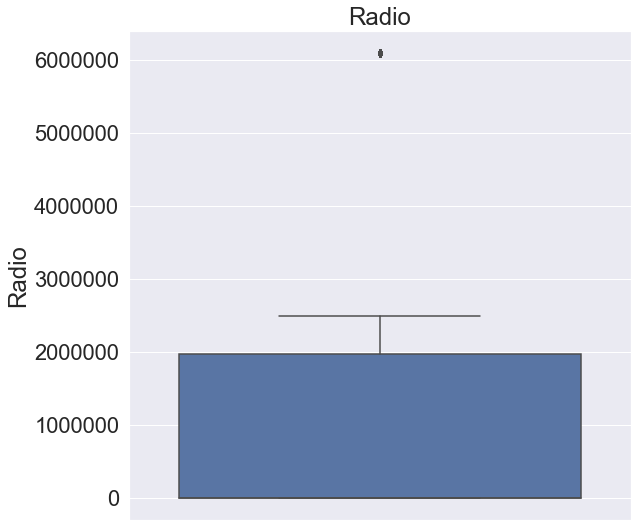

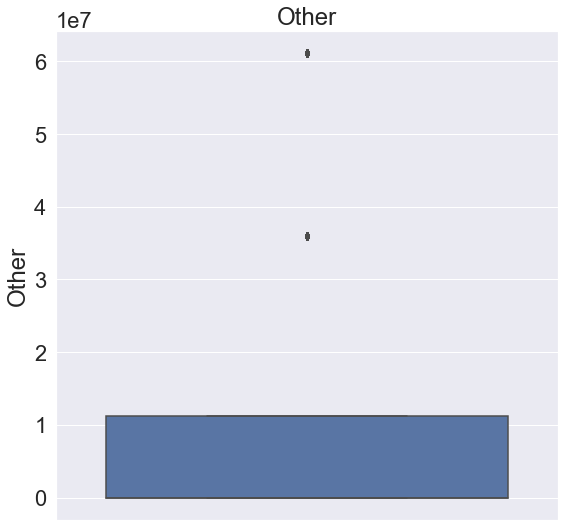

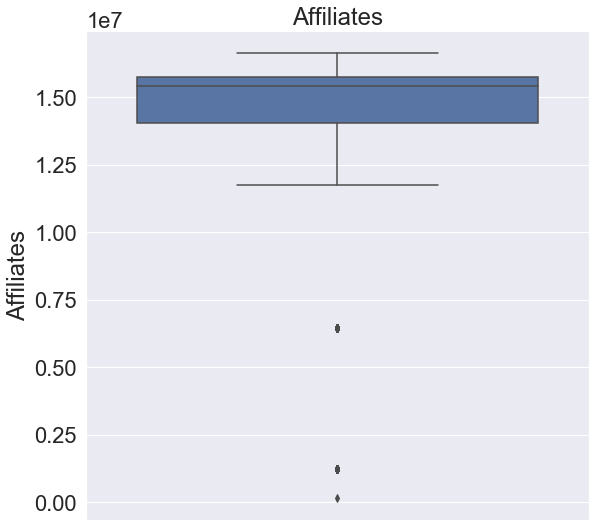

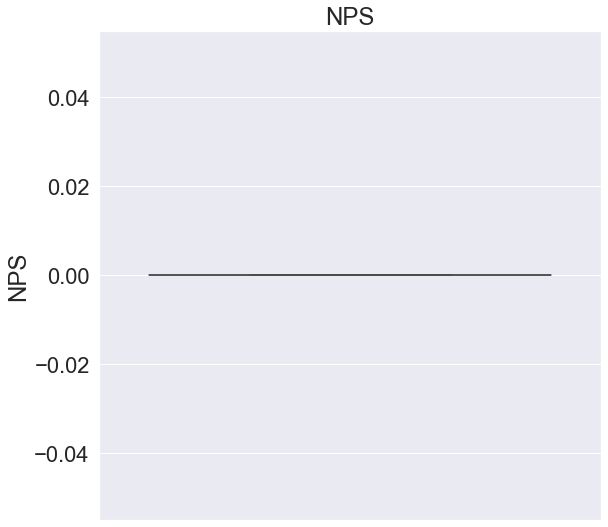

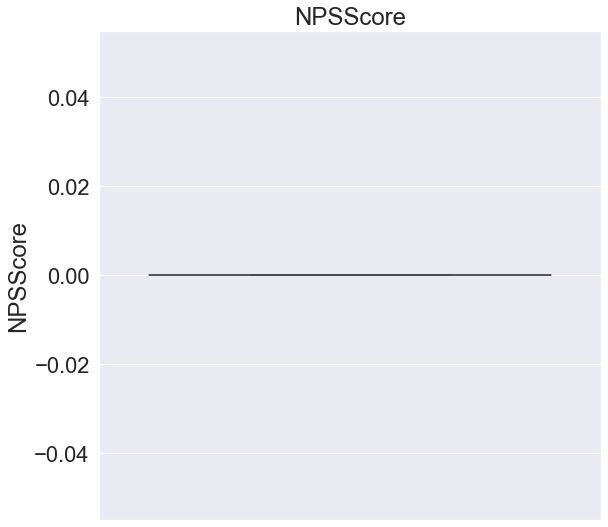

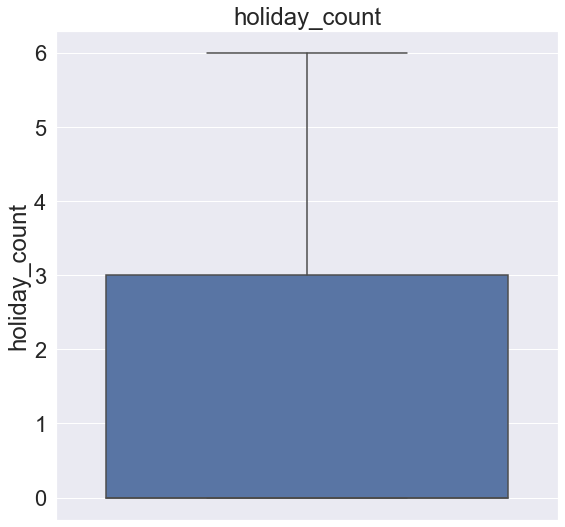

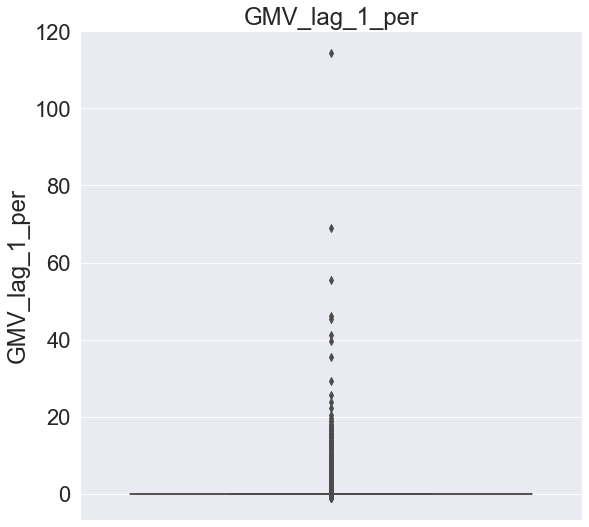

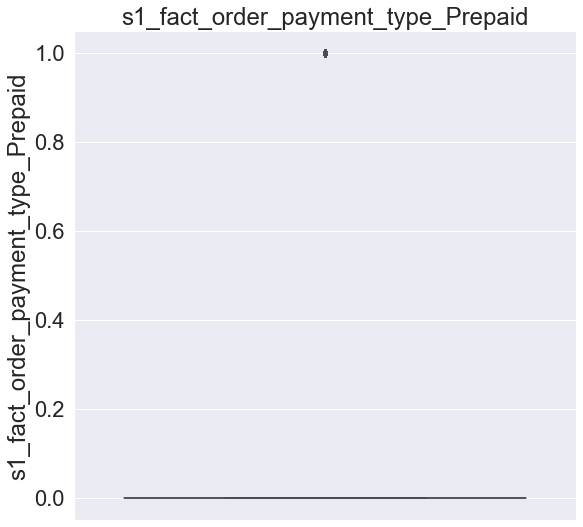

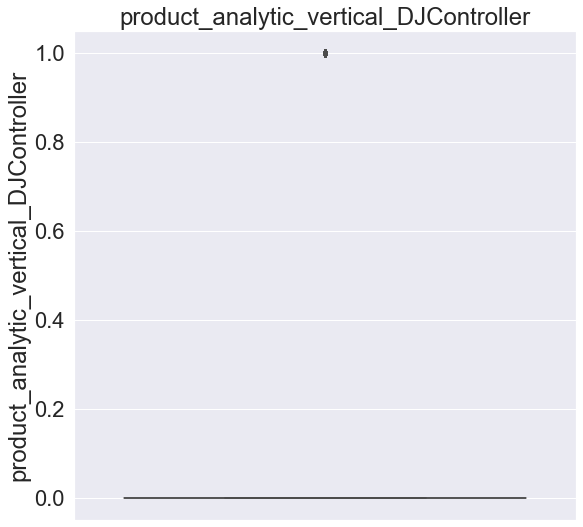

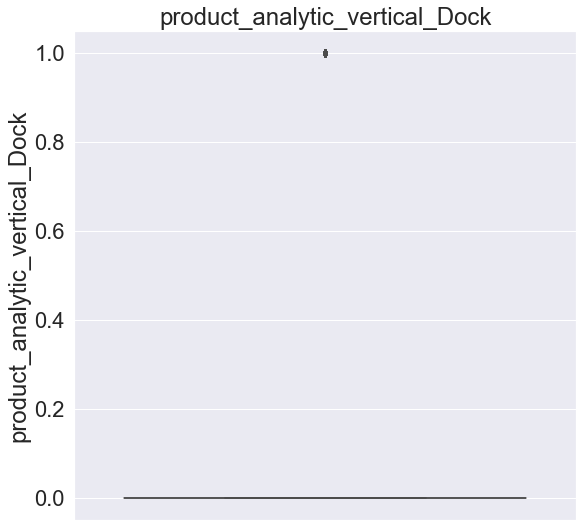

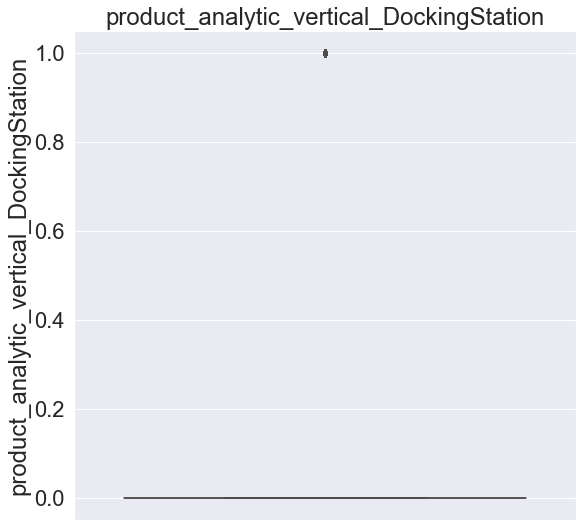

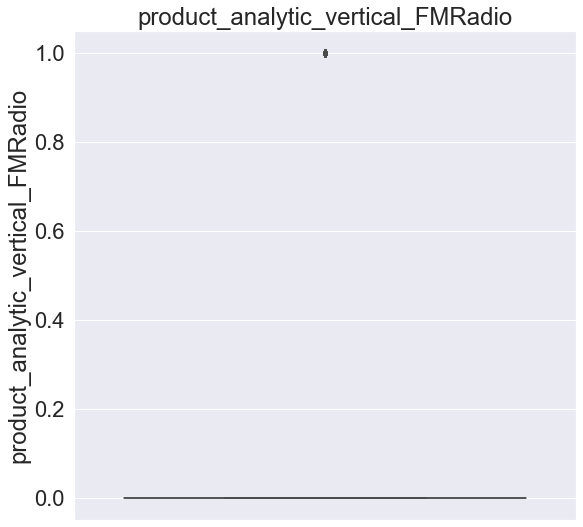

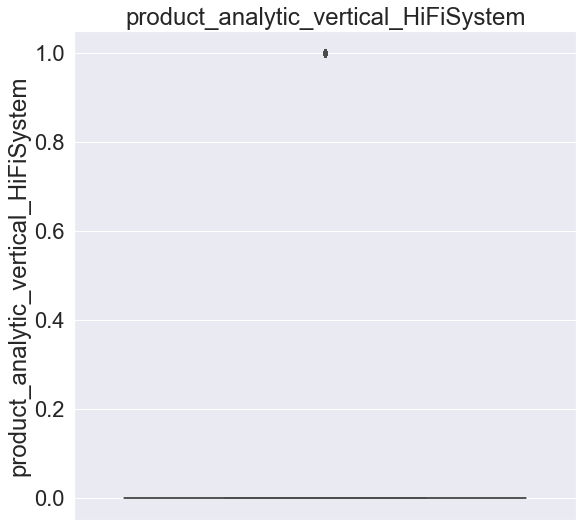

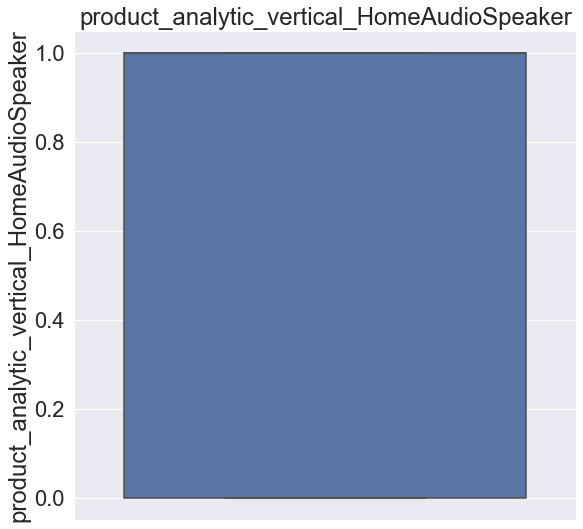

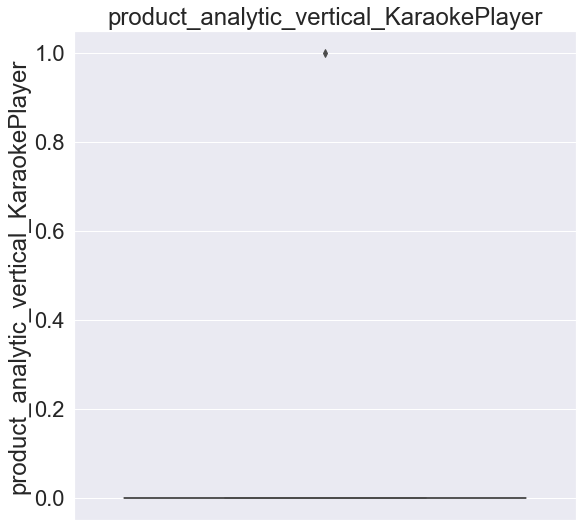

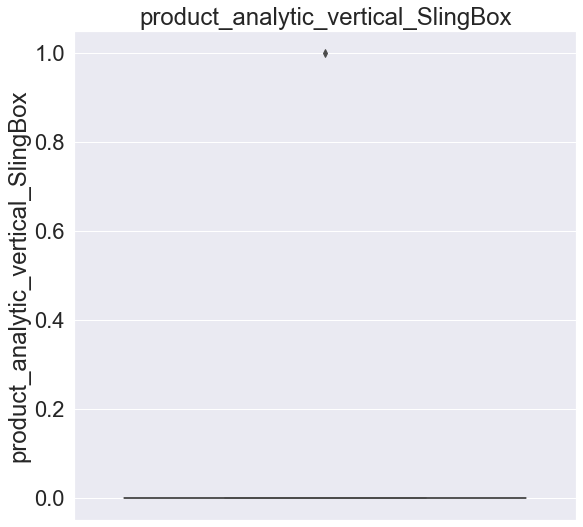

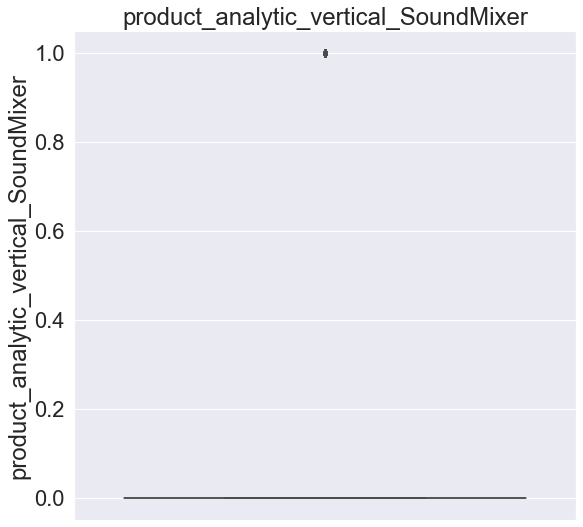

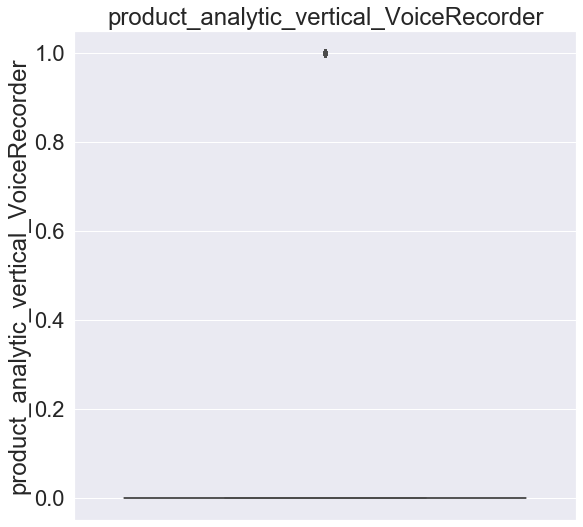

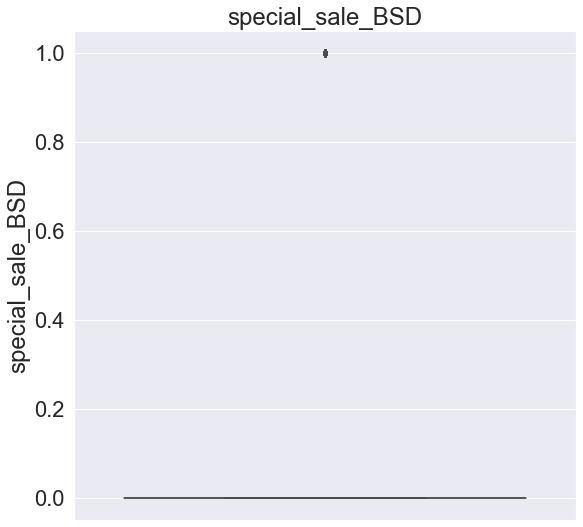

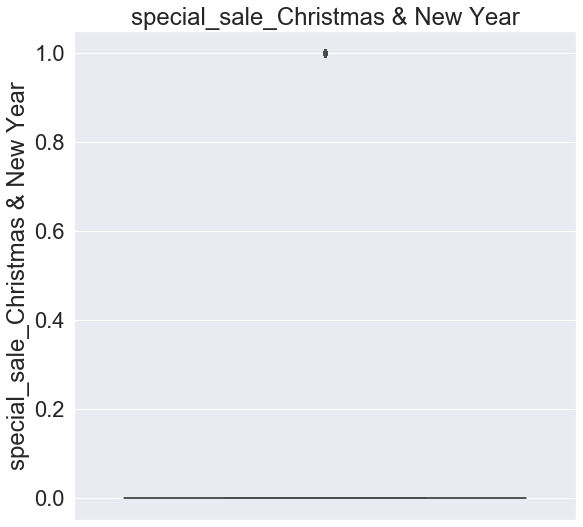

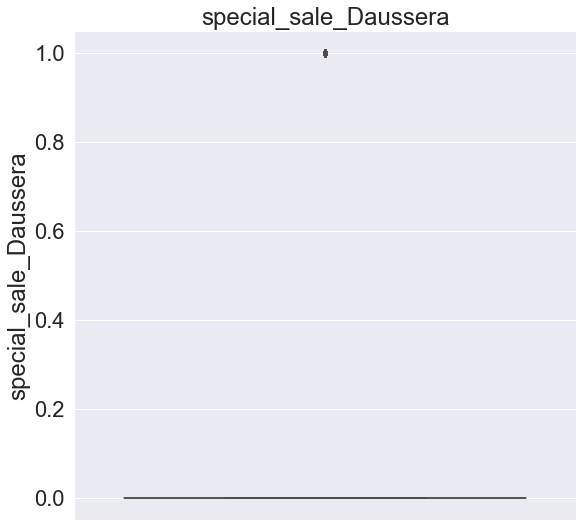

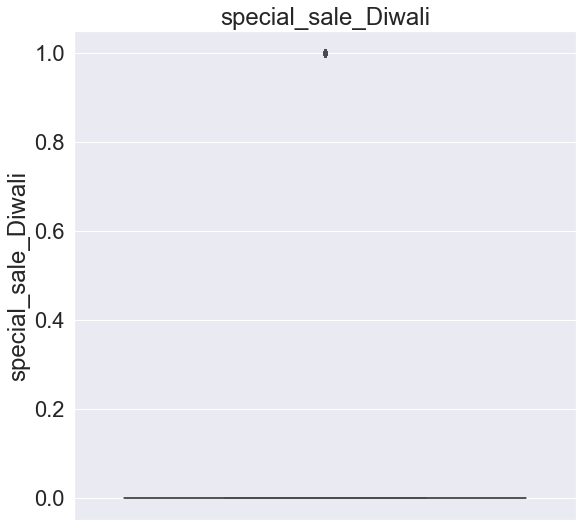

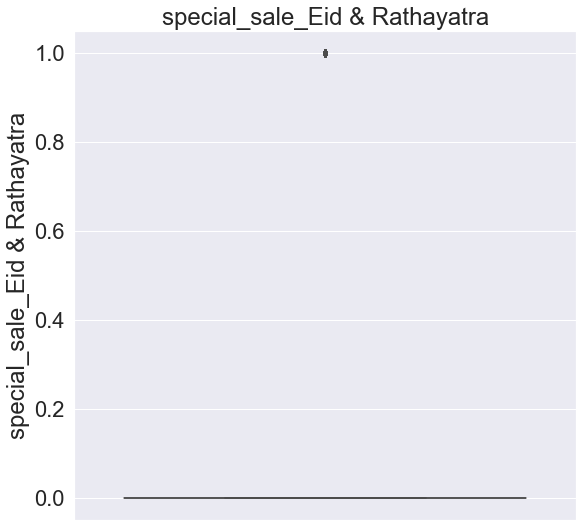

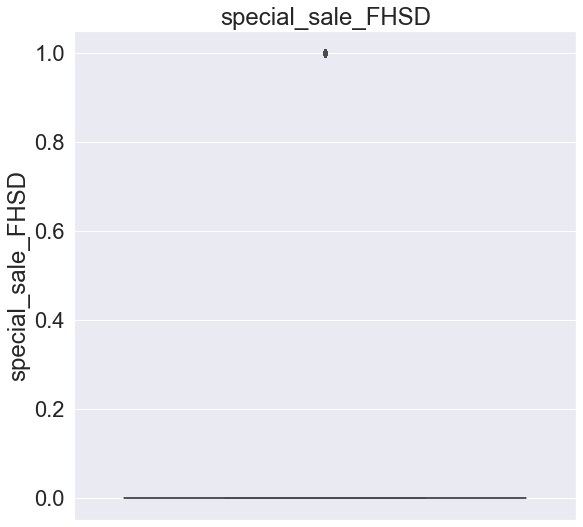

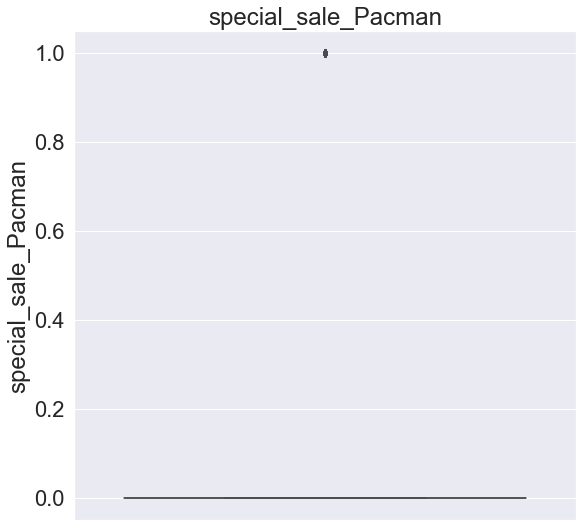

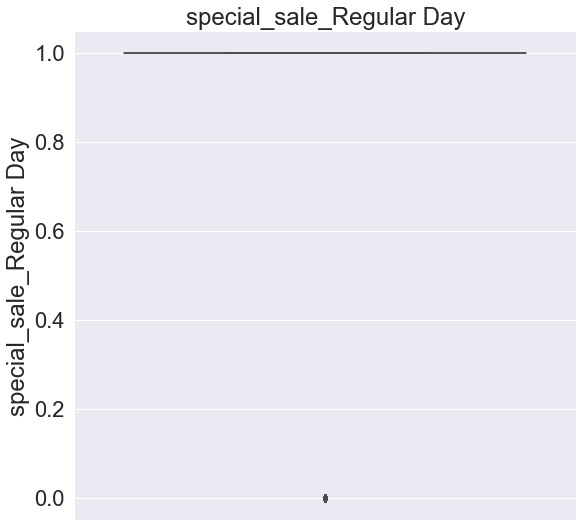

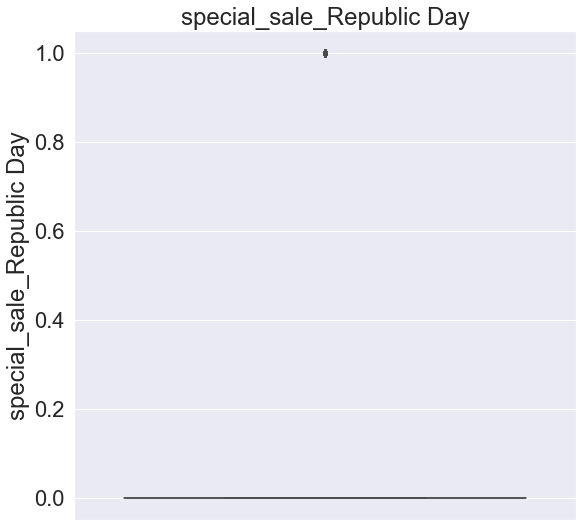

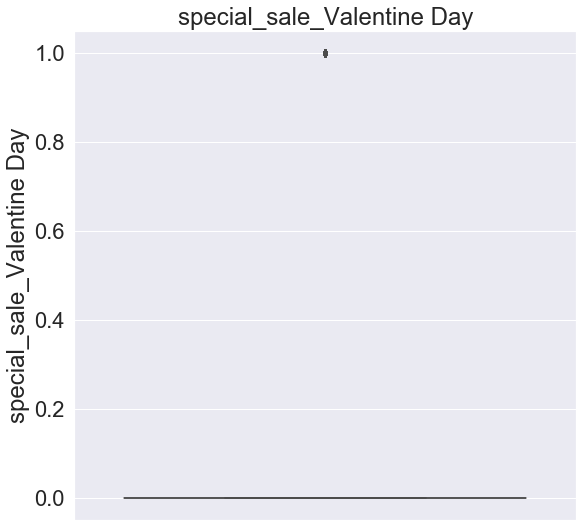

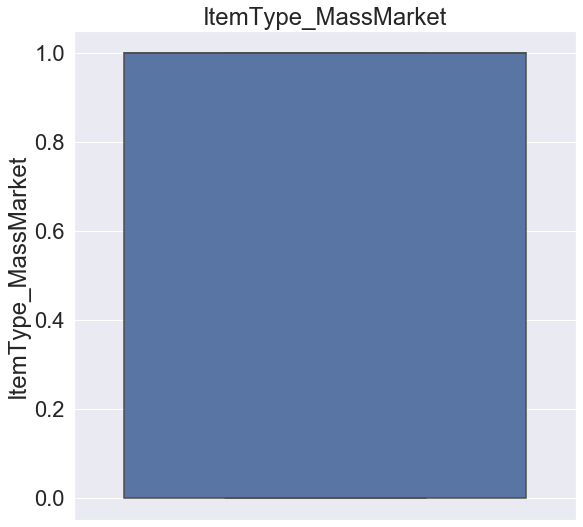

In [61]:
for col in list(ha.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=ha, y=col).set_title(col)

In [62]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [63]:
outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']

In [64]:
for col in outlier_cols:
        remove_outlier(ha, col)

In [65]:
ha.shape

(62116, 47)

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
df_train, df_test = train_test_split(ha, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler()

In [71]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 47 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gmv                                         62116 non-null  float64
 1   units                                       62116 non-null  int64  
 2   deliverycdays                               62116 non-null  int64  
 3   sla                                         62116 non-null  int64  
 4   product_mrp                                 62116 non-null  float64
 5   product_procurement_sla                     62116 non-null  int64  
 6   wday                                        62116 non-null  int64  
 7   Pay_Day                                     62116 non-null  int64  
 8   is_holiday                                  62116 non-null  int64  
 9   Discount_Percentage                         62116 non-null  float64
 10  delivery_o

In [73]:
ha['gmv'].unique()

array([6255., 6850., 6700., ..., 4895., 4775., 9600.])

In [74]:
# Create a list of the variables that you need to scale
varlist1 = []
dum_cols = list(dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in ha.columns:
    if col not in dum_cols:
        varlist1.append(col)

In [75]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [76]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
62022,0.00,0.00,0.00,0.23,0.01,0.29,1.00,0,0,0.42,...,0,0,0,0,0,0,1,0,0,1
61776,0.02,0.00,0.00,0.10,0.02,0.07,0.17,1,0,0.25,...,0,0,0,0,0,0,1,0,0,1
26367,0.03,0.00,0.00,0.13,0.03,0.36,0.17,1,0,0.22,...,0,0,0,0,0,0,1,0,0,1
41294,0.02,0.00,0.00,0.18,0.02,0.07,0.67,1,1,0.24,...,1,0,0,0,0,0,0,0,0,1
58467,0.01,0.00,0.00,0.20,0.01,0.21,0.00,0,0,0.22,...,0,0,0,0,0,0,1,0,0,1


In [77]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [78]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.35377817e-01 -4.87522129e-02  1.19819953e-01  6.08541183e-01
 -4.02969047e-02  6.83679612e-05  3.37571970e-04 -3.98295460e-04
 -3.64195880e-02 -1.13970174e-01 -1.08059682e+02  5.37342160e+00
  8.41517142e+00  5.54389648e+01  1.72486120e+00  1.38153874e+01
  1.91699177e+01  1.72189959e+00  1.80651061e+01  7.01816335e+00
 -1.21325172e-11  4.13695744e-11 -8.25012362e-05  3.82973081e-01
  9.68338221e-04  4.47092974e-02 -4.19927821e-03 -8.40493731e-03
 -7.17693364e-03  3.16432717e-03 -4.36368639e-03  4.32791712e-02
 -4.65896964e-03  3.21446739e-02  1.10284780e-03 -8.49479315e-06
  2.86195678e-04  1.04516015e-03  7.10281271e-04  7.36368796e-04
  1.37775395e-03 -9.37107720e-04  1.83895337e-04  1.23759370e-03
  5.63852100e-04 -7.06387137e-03]
-0.6663208798504621


In [80]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True False False  True False False False False False False  True  True
  True  True  True  True  True  True  True  True False False False  True
 False  True False False False False False  True False False False False
 False False False False False False False False False False]
[ 1  5  4  1  6 29 25 24  2  3  1  1  1  1  1  1  1  1  1  1 32 31 28  1
 17  1 13  9 10 14 12  1 11  7 16 30 26 20 23 22 18 15 27 19 21  8]


In [81]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,GMV_lag_1_per,product_analytic_vertical_DJController,product_analytic_vertical_KaraokePlayer
62022,1.00,0.00,0.01,0.58,1.00,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.01,0,0
61776,1.00,0.00,0.02,0.58,1.00,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.01,0,0
26367,1.00,0.00,0.03,0.62,0.58,0.21,0.67,0.31,0.92,0.29,0.00,0.00,0.93,0.01,0,0
41294,1.00,0.00,0.02,0.42,0.47,0.00,0.04,0.26,0.94,0.06,1.00,1.00,1.00,0.01,0,0
58467,1.00,0.00,0.01,0.28,0.30,0.13,0.14,0.19,0.87,0.09,0.00,0.00,0.94,0.01,0,0


In [82]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     9142.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:02:14   Log-Likelihood:             1.2217e+05
No. Observations:               43481   AIC:                        -2.443e+05
Df Residuals:                   43465   BIC:                        -2.442e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [85]:
#Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
3,Total Investment,"1,092,545,317.70"
6,Sponsorship,"419,990,590.16"
9,SEM,"52,344,352.76"
11,Other,"44,339,763.99"
8,Online marketing,"15,508,236.58"
5,Digital,"10,057,141.60"
12,Affiliates,"3,839,650.94"
4,TV,"2,121,627.29"
0,const,"495,677.76"
7,Content Marketing,"414,483.27"


In [86]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     9741.
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:04:29   Log-Likelihood:             1.2208e+05
No. Observations:               43481   AIC:                        -2.441e+05
Df Residuals:                   43466   BIC:                        -2.440e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0035      0.001     -2.958      0.003      -0.006      -0.001
units                                       0.1257      0.005     27.246      0.000       0.117       0.135
product_mrp                                 0.6170      0.002    340.195      0.000       0.613       0.621
TV                                         -0.0182      0.005     -3.893      0.000      -0.027      -0.009
Digital                                     0.0227      0.007      3.391      0.001       0.010       0.036
Sponsorship                                 0.0220      0.003      6.360      0.000       0.015       0.029
Content Marketing                          -0.0207      0.006     -3.339      0.001      -0.033      -0.009
Online marketing                           -0.0539      0.011     -4.988      0.000      -0.075      -0.033
SEM                                        -0.0102      0.007     -1.392      0.164      -0.025       0.004
Radio                                       0.0102      0.007      1.532      0.126      -0.003       0.023
Other                                   -3.816e-05      0.007     -0.005      0.996      -0.014       0.014
Affiliates                                  0.0583      0.011      5.219      0.000       0.036       0.080
GMV_lag_1_per                               0.4634      0.009     53.730      0.000       0.446       0.480
product_analytic_vertical_DJController      0.0549      0.002     27.264      0.000       0.051       0.059
product_analytic_vertical_KaraokePlayer     0.0670      0.015      4.586      0.000       0.038       0.096
==============================================================================
Omnibus:                    19693.414   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39729395.251
Skew:                          -0.470   Prob(JB):                         0.00
Kurtosis:                     151.082   Cond. No.                         430.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
11,Affiliates,"1,901.88"
7,Online marketing,"1,830.26"
8,SEM,"1,488.11"
10,Other,"1,363.48"
4,Digital,"1,238.39"
6,Content Marketing,"1,020.58"
9,Radio,"1,018.65"
5,Sponsorship,316.94
3,TV,309.53
0,const,277.58


In [88]:
# X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 1.048e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:05:14   Log-Likelihood:             1.2207e+05
No. Observations:               43481   AIC:                        -2.441e+05
Df Residuals:                   43467   BIC:                        -2.440e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0014      0.001     -1.321      0.186      -0.004       0.001
units                                       0.1257      0.005     27.236      0.000       0.117       0.135
product_mrp                                 0.6172      0.002    340.281      0.000       0.614       0.621
TV                                         -0.0060      0.004     -1.506      0.132      -0.014       0.002
Digital                                     0.0218      0.007      3.258      0.001       0.009       0.035
Sponsorship                                 0.0089      0.002      3.953      0.000       0.004       0.013
Content Marketing                          -0.0186      0.006     -3.005      0.003      -0.031      -0.006
SEM                                        -0.0109      0.007     -1.482      0.138      -0.025       0.004
Radio                                       0.0112      0.007      1.681      0.093      -0.002       0.024
Other                                      -0.0051      0.007     -0.720      0.472      -0.019       0.009
Affiliates                                  0.0039      0.002      1.615      0.106      -0.001       0.009
GMV_lag_1_per                               0.4634      0.009     53.715      0.000       0.446       0.480
product_analytic_vertical_DJController      0.0547      0.002     27.162      0.000       0.051       0.059
product_analytic_vertical_KaraokePlayer     0.0670      0.015      4.586      0.000       0.038       0.096
==============================================================================
Omnibus:                    19655.574   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40032313.020
Skew:                          -0.461   Prob(JB):                         0.00
Kurtosis:                     151.646   Cond. No.                         342.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,SEM,"1,487.62"
9,Other,"1,336.07"
4,Digital,"1,237.50"
8,Radio,"1,017.74"
6,Content Marketing,"1,015.81"
0,const,244.67
3,TV,224.81
5,Sponsorship,134.20
10,Affiliates,89.10
2,product_mrp,1.06


In [90]:
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 1.136e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:05:59   Log-Likelihood:             1.2207e+05
No. Observations:               43481   AIC:                        -2.441e+05
Df Residuals:                   43468   BIC:                        -2.440e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0011      0.001     -1.049      0.294      -0.003       0.001
units                                       0.1256      0.005     27.223      0.000       0.117       0.135
product_mrp                                 0.6172      0.002    340.279      0.000       0.614       0.621
TV                                         -0.0097      0.003     -3.113      0.002      -0.016      -0.004
Digital                                     0.0147      0.005      3.152      0.002       0.006       0.024
Sponsorship                                 0.0088      0.002      3.915      0.000       0.004       0.013
Content Marketing                          -0.0213      0.006     -3.607      0.000      -0.033      -0.010
Radio                                       0.0021      0.003      0.812      0.417      -0.003       0.007
Other                                       0.0043      0.003      1.331      0.183      -0.002       0.011
Affiliates                                  0.0051      0.002      2.250      0.024       0.001       0.010
GMV_lag_1_per                               0.4636      0.009     53.751      0.000       0.447       0.481
product_analytic_vertical_DJController      0.0547      0.002     27.177      0.000       0.051       0.059
product_analytic_vertical_KaraokePlayer     0.0670      0.015      4.586      0.000       0.038       0.096
==============================================================================
Omnibus:                    19647.774   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40048380.047
Skew:                          -0.460   Prob(JB):                         0.00
Kurtosis:                     151.676   Cond. No.                         333.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
6,Content Marketing,926.32
4,Digital,599.69
8,Other,273.62
0,const,235.14
7,Radio,150.43
3,TV,137.17
5,Sponsorship,134.10
9,Affiliates,78.89
2,product_mrp,1.06
10,GMV_lag_1_per,1.05


In [92]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Other', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:07:01   Log-Likelihood:             1.2206e+05
No. Observations:               43481   AIC:                        -2.441e+05
Df Residuals:                   43469   BIC:                        -2.440e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0003      0.001     -0.345      0.730      -0.002       0.001
units                                       0.1256      0.005     27.223      0.000       0.117       0.135
product_mrp                                 0.6172      0.002    340.305      0.000       0.614       0.621
TV                                         -0.0061      0.002     -3.924      0.000      -0.009      -0.003
Digital                                     0.0113      0.004      2.892      0.004       0.004       0.019
Sponsorship                                 0.0066      0.002      4.344      0.000       0.004       0.010
Content Marketing                          -0.0168      0.005     -3.468      0.001      -0.026      -0.007
Radio                                       0.0050      0.001      3.971      0.000       0.003       0.008
Affiliates                                  0.0029      0.002      1.877      0.060      -0.000       0.006
GMV_lag_1_per                               0.4639      0.009     53.791      0.000       0.447       0.481
product_analytic_vertical_DJController      0.0547      0.002     27.187      0.000       0.051       0.059
product_analytic_vertical_KaraokePlayer     0.0670      0.015      4.586      0.000       0.038       0.096
==============================================================================
Omnibus:                    19625.018   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40092842.950
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                     151.758   Cond. No.                         331.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
6,Content Marketing,624.44
4,Digital,423.60
0,const,157.06
5,Sponsorship,61.12
7,Radio,36.95
8,Affiliates,35.97
3,TV,34.22
2,product_mrp,1.06
9,GMV_lag_1_per,1.05
1,units,1.02


In [94]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                          2.476e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:07:51   Log-Likelihood:                      1.2206e+05
No. Observations:               43481   AIC:                                 -2.441e+05
Df Residuals:                   43470   BIC:                                 -2.440e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1256      0.005     27.225      0.000       0.117       0.135
product_mrp                                 0.6172      0.002    340.451      0.000       0.614       0.621
TV                                         -0.0056      0.001     -8.633      0.000      -0.007      -0.004
Digital                                     0.0100      0.001      8.905      0.000       0.008       0.012
Sponsorship                                 0.0061      0.001      8.023      0.000       0.005       0.008
Content Marketing                          -0.0152      0.001    -11.302      0.000      -0.018      -0.013
Radio                                       0.0046      0.000     10.230      0.000       0.004       0.006
Affiliates                                  0.0024      0.000      7.411      0.000       0.002       0.003
GMV_lag_1_per                               0.4637      0.009     53.861      0.000       0.447       0.481
product_analytic_vertical_DJController      0.0547      0.002     27.192      0.000       0.051       0.059
product_analytic_vertical_KaraokePlayer     0.0670      0.015      4.586      0.000       0.038       0.096
==============================================================================
Omnibus:                    19613.799   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40105846.553
Skew:                          -0.453   Prob(JB):                         0.00
Kurtosis:                     151.782   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
5,Content Marketing,88.97
3,Digital,58.57
4,Sponsorship,36.88
2,TV,28.45
7,Affiliates,15.84
6,Radio,5.96
8,GMV_lag_1_per,2.23
1,product_mrp,1.84
9,product_analytic_vertical_DJController,1.03
0,units,1.02


In [96]:
X_train_rfe1 = X_train_rfe1.drop('Content Marketing', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                          2.715e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:09:02   Log-Likelihood:                      1.2200e+05
No. Observations:               43481   AIC:                                 -2.440e+05
Df Residuals:                   43471   BIC:                                 -2.439e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1249      0.005     27.028      0.000       0.116       0.134
product_mrp                                 0.6210      0.002    348.211      0.000       0.617       0.624
TV                                         -0.0004      0.000     -0.814      0.416      -0.001       0.001
Digital                                    -0.0015      0.000     -3.140      0.002      -0.002      -0.001
Sponsorship                                 0.0010      0.001      1.647      0.100      -0.000       0.002
Radio                                       0.0005      0.000      1.875      0.061   -2.28e-05       0.001
Affiliates                               2.427e-06      0.000      0.010      0.992      -0.000       0.000
GMV_lag_1_per                               0.4901      0.008     59.061      0.000       0.474       0.506
product_analytic_vertical_DJController      0.0544      0.002     27.013      0.000       0.050       0.058
product_analytic_vertical_KaraokePlayer     0.0666      0.015      4.554      0.000       0.038       0.095
==============================================================================
Omnibus:                    20847.935   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39619157.334
Skew:                          -0.656   Prob(JB):                         0.00
Kurtosis:                     150.874   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Sponsorship,23.94
2,TV,13.98
3,Digital,10.52
6,Affiliates,9.04
5,Radio,2.08
7,GMV_lag_1_per,2.07
1,product_mrp,1.77
0,units,1.02
8,product_analytic_vertical_DJController,1.02
9,product_analytic_vertical_KaraokePlayer,1.00


In [98]:
# Predicting using the 12th model
y_train_price = lm_7.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

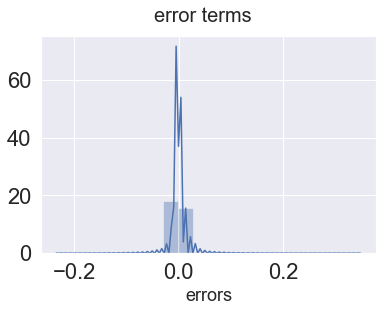

In [99]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)

In [100]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [101]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [102]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [103]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Radio',
       'Other', 'Affiliates', 'GMV_lag_1_per',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_KaraokePlayer'],
      dtype='object')

In [104]:
X_train_rfe1.columns

Index(['units', 'product_mrp', 'TV', 'Digital', 'Sponsorship', 'Radio',
       'Affiliates', 'GMV_lag_1_per', 'product_analytic_vertical_DJController',
       'product_analytic_vertical_KaraokePlayer'],
      dtype='object')

In [105]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
#X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [106]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'TV', 'Digital', 'Sponsorship', 'Radio',
       'Affiliates', 'GMV_lag_1_per', 'product_analytic_vertical_DJController',
       'product_analytic_vertical_KaraokePlayer'],
      dtype='object')

In [107]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18635 entries, 44315 to 1387
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   units                                    18635 non-null  float64
 1   product_mrp                              18635 non-null  float64
 2   TV                                       18635 non-null  float64
 3   Digital                                  18635 non-null  float64
 4   Sponsorship                              18635 non-null  float64
 5   Radio                                    18635 non-null  float64
 6   Affiliates                               18635 non-null  float64
 7   GMV_lag_1_per                            18635 non-null  float64
 8   product_analytic_vertical_DJController   18635 non-null  uint8  
 9   product_analytic_vertical_KaraokePlayer  18635 non-null  uint8  
dtypes: float64(8), uint8(2)
memory usage: 1.3 M

In [108]:
# Making predictions
y_pred = lm_7.predict(X_test_rfe2)

In [109]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(18635, 10)
(43481, 10)


Text(0, 0.5, 'y_pred')

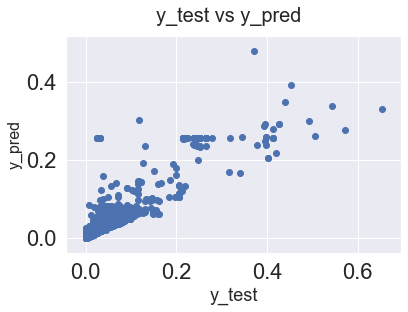

In [110]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [111]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7627739990720998

In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [113]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.01380240629741842

In [114]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [115]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
regr.score(X_test, y_test)

0.851751529934007

In [ ]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

Cross Validation scores:  [0.85557067 0.82744368 0.83989825 0.8188572  0.85235204]
Mean and std deviation:  0.8388243677059604 0.014091114570010695
